# AUDIOGRAM PREDICT

This is a project to predict audiogram values

### Part One: Analysis

## Settings

#### Path

In [4]:
from pathlib import Path
import os

# Sets base path
b_path = Path.home() / 'Development' / 'audiogram'
os.chdir(b_path)
!ls

d_path = b_path / 'dataset'
n_path = b_path / 'notebook'
s_path = b_path / 'scripts'

dataset  notebook	 README.md		      scripts
model	 pyproject.toml  requirements_experiment.txt  src


#### Install

In [29]:
!pip install autoviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 1.2 MB/s eta 0:00:0031m929.9 kB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 5.6 MB/s eta 0:00:00 MB/s eta 0:00:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 192.9/192.9 MB 14.7 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.5/18.5 MB 44.2 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 71.2 MB/s eta 0:00:00
  Using cached nltk-3.7-py3-none-any.whl (1.5 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 636.8/636.8 kB 25.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 39.5 MB/s eta 0:00:000:00:01m eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.9/11.9 MB 55.1 MB/s eta 0:00:00 MB/s eta 0:00:0101
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 52.9 MB/s eta 0:00:000:00:01m eta 0:00:01
  Using cached seaborn-0.11.2-py3-none-any.whl (292 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━

  Using cached joblib-1.1.0-py2.py3-none-any.whl (306 kB)
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.7/233.7 kB 63.4 MB/s eta 0:00:00


  Using cached idna-3.3-py3-none-any.whl (61 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 kB 817.3 kB/s eta 0:00:00 MB/s eta 0:00:01
  Attempting uninstall: setuptools
    Found existing installation: setuptools 62.3.2
    Uninstalling setuptools-62.3.2:
      Successfully uninstalled setuptools-62.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
python-benedict 0.25.2 requires toml<1.0.0,>=0.10.2, which is not installed.
dvc 2.15.0 requires appdirs>=1.4.3, which is not installed.
dvc 2.15.0 requires colorama>=0.3.9, which is not installed.
dvc 2.15.0 requires distro>=1.3.0, which is not installed.
dvc 2.15.0 requires rich>=10.13.0, which is not installed.
dvc 2.15.0 requires toml>=0.10.1, which is not installed.
en-ner-bc5cdr-md 0.5.0 requires spacy<3.3.0,>=3.2.3, but you have spacy 3.3.0 which is incompatible.
en-core-web-sm 3.2.0 requires sp

#### Import

In [32]:
%matplotlib inline

In [507]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from autoviz.AutoViz_Class import AutoViz_Class
from tqdm import tqdm
from scipy import stats

#### Configuration

In [85]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 500)

In [87]:
import warnings
warnings.filterwarnings('ignore')

## Data Wrangling

#### Overview

In [88]:
df_audio = pd.read_csv(d_path / 'Paper3_WebData_Final.csv')

In [89]:
# Nan Values
for column in df_audio.columns:
    print(f'Column: {column} / NaN Count:{df_audio[df_audio[column].isna()].shape[0]}')

Column: test_date / NaN Count:0
Column: nid / NaN Count:0
Column: L500k / NaN Count:224
Column: L1k / NaN Count:493
Column: L2k / NaN Count:915
Column: L3k / NaN Count:680
Column: L4k / NaN Count:408
Column: L6k / NaN Count:352
Column: L8k / NaN Count:48734
Column: R500k / NaN Count:276
Column: R1k / NaN Count:404
Column: R2k / NaN Count:942
Column: R3k / NaN Count:680
Column: R4k / NaN Count:483
Column: R6k / NaN Count:426
Column: R8k / NaN Count:48995
Column: gender / NaN Count:8211
Column: naics / NaN Count:0
Column: age_group / NaN Count:16720
Column: region / NaN Count:43115
Column: NAICS_descr / NaN Count:15275


In [95]:
# Overview Value Counts
for c in df_audio.columns:
    if c.startswith(('R','L')):
        print(f'Column: {c}')
        df_s = df_audio[df_audio[c]!='**'][~df_audio[c].isna()][c].astype("int")
        print(df_s.value_counts())
        print("")

Column: L500k
 10    872279
 5     825897
 15    478735
 0     452857
 20    188119
 25     68513
 30     26555
 35     11663
 40      6225
 45      3770
 50      2277
 55      1490
 60      1125
-5       1088
 65       727
 70       455
 75       318
 80       274
 90       212
 85       163
-1        147
 99        81
 96        74
 95        65
 97        53
 98        29
 8         14
 13         9
 1          8
 6          7
 3          7
 12         7
 14         6
 4          5
 22         4
 7          4
 17         4
 16         3
 94         3
 18         3
 28         2
 11         2
 27         2
 9          2
 23         2
 24         1
 2          1
 21         1
 32         1
Name: L500k, dtype: int64

Column: L1k
 5     951386
 10    695813
 0     643820
 15    353967
 20    159955
 25     62413
 30     28705
 35     15277
 40      9219
 45      6719
 50      4464
 55      3088
 60      1961
-5       1884
 65      1229
 70       823
 75       567
 80       406
-1       

 0     623898
 5     618524
 10    523200
 15    341752
 20    218375
 25    142489
 30     95987
 35     71863
 40     58517
 45     54694
 50     50504
 55     47200
 60     36601
 65     24014
 70     14342
 75      8791
 80      4497
 85      2257
-5       2016
 90      1369
-1        316
 95       295
 99       222
 96       133
 97        67
 98        44
 8          6
 11         6
 4          5
 6          5
 2          4
 92         4
 94         3
 18         3
 3          3
 56         2
 7          2
 29         2
 62         2
 52         2
 28         2
 76         2
 17         2
 14         1
 54         1
 9          1
 22         1
 23         1
 26         1
 57         1
 59         1
 19         1
 21         1
 24         1
 33         1
 81         1
 16         1
 47         1
 51         1
 53         1
 1          1
 42         1
 43         1
 86         1
Name: R3k, dtype: int64

Column: R4k
 5     483656
 10    481779
 0     455894
 15    362732
 20    2593

In [93]:
# Overview ** values
for c in df_audio.columns:
    if c.startswith(('R','L')):
        count = df_audio[df_audio[c]=='**'][c].shape[0]
        print(f'Column: {c} / Count: {count}')

Column: L500k / Count: 1157
Column: L1k / Count: 1229
Column: L2k / Count: 1540
Column: L3k / Count: 1898
Column: L4k / Count: 2601
Column: L6k / Count: 4887
Column: L8k / Count: 738052
Column: R500k / Count: 1102
Column: R1k / Count: 1238
Column: R2k / Count: 1552
Column: R3k / Count: 1947
Column: R4k / Count: 2572
Column: R6k / Count: 4829
Column: R8k / Count: 738034


In [100]:
df_audio.head()

,test_date,nid,L500k,L1k,L2k,L3k,L4k,L6k,L8k,R500k,R1k,R2k,R3k,R4k,R6k,R8k,gender,naics,age_group,region,NAICS_descr
0,08-FEB-2005,1,10,5,5,15,10,5,25,20,20,15,10,10,25,45,M,331512,4.0,MA,Steel Investment Foundries
1,17-MAR-2009,1,15,10,5,15,5,10,25,15,20,20,15,10,35,55,M,331512,5.0,MA,Steel Investment Foundries
2,08-FEB-2005,2,5,10,20,20,15,20,0,5,0,5,10,10,15,15,M,331512,2.0,MA,Steel Investment Foundries
3,29-FEB-2008,2,15,5,15,20,20,15,15,10,0,10,15,30,20,15,M,331512,3.0,MA,Steel Investment Foundries
4,08-FEB-2006,3,25,20,15,20,35,25,15,20,20,10,15,40,30,30,M,331512,3.0,MA,Steel Investment Foundries


#### Cleaning and Format

In [101]:
# Get only valueable columns
df_audio = df_audio.iloc[:,2:-1]

In [103]:
# Drop NaN values
df_audio.dropna(inplace=True)

In [109]:
# Split dataset into L and R
L_columns = [c for c in df_audio.columns if not c.startswith('R')]
R_columns = [c for c in df_audio.columns if not c.startswith('L')]
df_audio_l = df_audio[L_columns]
df_audio_r = df_audio[R_columns]

In [112]:
# Create ear column
df_audio_l['side'] = 'L'
df_audio_r['side'] = 'R'

In [123]:
# Remove column specific name
# Left
for c in df_audio_l.columns:
    if c.startswith('L'):
        df_audio_l.rename(columns={c:c[1:]},inplace=True)

# Right
for c in df_audio_r.columns:
    if c.startswith('R'):
        df_audio_r.rename(columns={c:c[1:]}, inplace=True)

In [ ]:
# Backup df_audio
df_audio_bak_1 = df_audio.copy()

In [149]:
# Join Datasets
df_audio = pd.concat([df_audio_l, df_audio_r])

In [150]:
# Arrange Index
df_audio.reset_index(inplace=True, drop=True)

In [151]:
# 1 Checkpoint
df_audio.to_csv(d_path / 'df_audio_check_1.csv', index=False)

In [174]:
# 1 Checkpoint
df_audio = pd.read_csv(d_path / 'df_audio_check_1.csv')

In [177]:
df_audio.head()

,500k,1k,2k,3k,4k,6k,8k,gender,naics,age_group,region,side
0,10,5,5,15,10,5,25,M,331512,4.0,MA,L
1,15,10,5,15,5,10,25,M,331512,5.0,MA,L
2,5,10,20,20,15,20,0,M,331512,2.0,MA,L
3,15,5,15,20,20,15,15,M,331512,3.0,MA,L
4,25,20,15,20,35,25,15,M,331512,3.0,MA,L


In [178]:
# Change ** to NaN
df_audio.replace('**', np.nan, inplace=True)

In [179]:
# Convert Frequency Columns to Float
cols = df_audio.columns[0:7]
for c in cols:
    df_audio[c] = df_audio[c].astype('float16')

In [180]:
# Remove NaN values from 500k to 6k
cols = df_audio.columns[0:6]
df_audio.dropna(subset=cols, inplace=True)

In [181]:
# New NaN values
for column in df_audio.columns:
    print(f'Column: {column} / NaN Count:{df_audio[df_audio[column].isna()].shape[0]}')

Column: 500k / NaN Count:0
Column: 1k / NaN Count:0
Column: 2k / NaN Count:0
Column: 3k / NaN Count:0
Column: 4k / NaN Count:0
Column: 6k / NaN Count:0
Column: 8k / NaN Count:1449191
Column: gender / NaN Count:0
Column: naics / NaN Count:0
Column: age_group / NaN Count:0
Column: region / NaN Count:0
Column: side / NaN Count:0


In [195]:
# Remove non 5 multiples from 500k to 6k
cols = df_audio.columns[0:6]
df_audio_freq = df_audio[cols]

In [196]:
cond = df_audio_freq % 5 == 0
df_audio_freq.where(cond, np.NaN, inplace=True)

In [207]:
lines = df_audio_freq.dropna().index
df_audio = df_audio.loc[lines]

In [209]:
df_audio.reset_index(inplace=True, drop=True)

In [220]:
# Remove non 5 multiple from 8k
df_audio['8k'] = df_audio['8k'].replace(98.0, 95.0)

In [222]:
lines = df_audio.dropna()[df_audio['8k']%5!=0].index

In [224]:
df_audio.drop(lines, inplace=True)

In [228]:
df_audio.reset_index(inplace=True, drop=True)

In [229]:
# 2 Checkpoint
df_audio.to_csv(d_path / 'df_audio_check_2.csv', index=False)

In [339]:
# 2 Checkpoint
df_audio = pd.read_csv(d_path / 'df_audio_check_2.csv')

#### Fill 8k Column

Fill 8k NaN values with the other frequencies mean

In [340]:
def get_closer_5_multi(n):
    r = n % 5
    return n+(5-r) if r>=2.5 else n-r

In [267]:
# Fill 8k values based on mean from other columns
df_means_8k = {}
for c in df_audio.columns:
    means_d = df_audio.groupby(c)['8k'].mean().to_dict()
    df_means_8k[c] = {k:get_closer_5_multi(v) for k,v in means_d.items()}

In [285]:
df_means_8k

{'500k': {-5.0: 15.0,
  0.0: 20.0,
  5.0: 20.0,
  10.0: 20.0,
  15.0: 25.0,
  20.0: 30.0,
  25.0: 40.0,
  30.0: 45.0,
  35.0: 50.0,
  40.0: 55.0,
  45.0: 60.0,
  50.0: 65.0,
  55.0: 65.0,
  60.0: 70.0,
  65.0: 70.0,
  70.0: 75.0,
  75.0: 80.0,
  80.0: 80.0,
  85.0: 85.0,
  90.0: 85.0,
  95.0: 90.0},
 '1k': {-5.0: 10.0,
  0.0: 20.0,
  5.0: 20.0,
  10.0: 25.0,
  15.0: 30.0,
  20.0: 35.0,
  25.0: 40.0,
  30.0: 50.0,
  35.0: 55.0,
  40.0: 55.0,
  45.0: 60.0,
  50.0: 60.0,
  55.0: 65.0,
  60.0: 70.0,
  65.0: 70.0,
  70.0: 75.0,
  75.0: 75.0,
  80.0: 80.0,
  85.0: 80.0,
  90.0: 85.0,
  95.0: 90.0},
 '2k': {-5.0: 10.0,
  0.0: 15.0,
  5.0: 20.0,
  10.0: 20.0,
  15.0: 25.0,
  20.0: 30.0,
  25.0: 35.0,
  30.0: 40.0,
  35.0: 45.0,
  40.0: 50.0,
  45.0: 55.0,
  50.0: 55.0,
  55.0: 60.0,
  60.0: 65.0,
  65.0: 70.0,
  70.0: 70.0,
  75.0: 75.0,
  80.0: 75.0,
  85.0: 80.0,
  90.0: 85.0,
  95.0: 90.0},
 '3k': {-5.0: 5.0,
  0.0: 15.0,
  5.0: 15.0,
  10.0: 20.0,
  15.0: 25.0,
  20.0: 25.0,
  25.0: 30.0,


In [341]:
cols = ['500k', '1k', '2k', '3k', '4k', '6k']

In [342]:
df_total_means = {}
for line, value in tqdm(enumerate(df_audio['8k'].values)):
    if value%5!=0:
        total=0
        count=0
        ds = df_audio.loc[line]
        for c in cols:
            _d = df_means_8k[c]
            _mean = _d[ds[c]]
            if value%5!=0:
                total += _d[ds[c]]
                count += 1
        
        df_total_means[line]=get_closer_5_multi(total/count)

5639396it [02:33, 36794.52it/s] 


In [343]:
len(df_total_means) == df_audio[df_audio['8k'].isna()].shape[0]

True

In [344]:
for line, value in tqdm(df_total_means.items()):
    df_audio.at[line, '8k'] = value

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1448101/1448101 [00:06<00:00, 236335.91it/s]


In [355]:
# New NaN values
for column in df_audio.columns:
    print(f'Column: {column} / NaN Count:{df_audio[df_audio[column].isna()].shape[0]}')

Column: 500k / NaN Count:0
Column: 1k / NaN Count:0
Column: 2k / NaN Count:0
Column: 3k / NaN Count:0
Column: 4k / NaN Count:0
Column: 6k / NaN Count:0
Column: 8k / NaN Count:0
Column: gender / NaN Count:0
Column: naics / NaN Count:0
Column: age_group / NaN Count:0
Column: region / NaN Count:0
Column: side / NaN Count:0


In [371]:
# 3 Checkpoint
df_audio.to_csv(d_path / 'df_audio_check_3.csv', index=False)

In [437]:
# 3 Checkpoint
df_audio = pd.read_csv(d_path / 'df_audio_check_3.csv')

#### Finish Formating and Visualize Dataset

In [438]:
# Transform Float into Int
cols = df_audio.columns[0:7]

In [439]:
# Frequencies -128/127 int8
for c in cols:
    df_audio[c] = df_audio[c].astype('int8')

    max_rows_analyzed is smaller than dataset shape 5639396...
        randomly sampled 150000 rows from read CSV file
Shape of your Data Set loaded: (150000, 12)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    12 Predictors classified...
        No variables removed since no ID or low-information variables found in data set
Since Number of Rows in data 150000 exceeds maximum, randomly sampling 150000 rows for EDA...


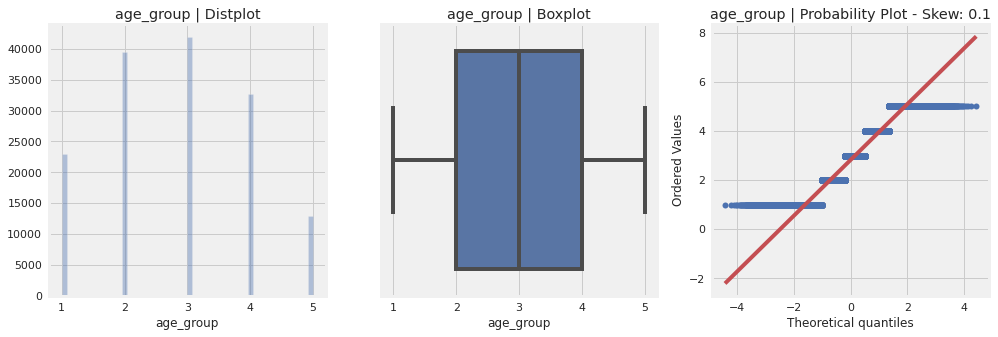

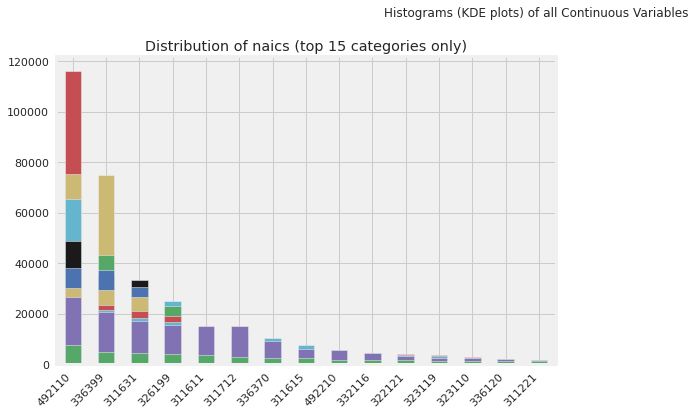

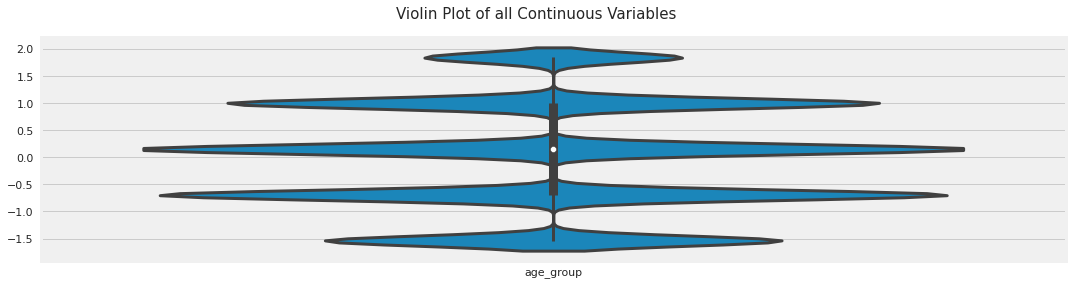

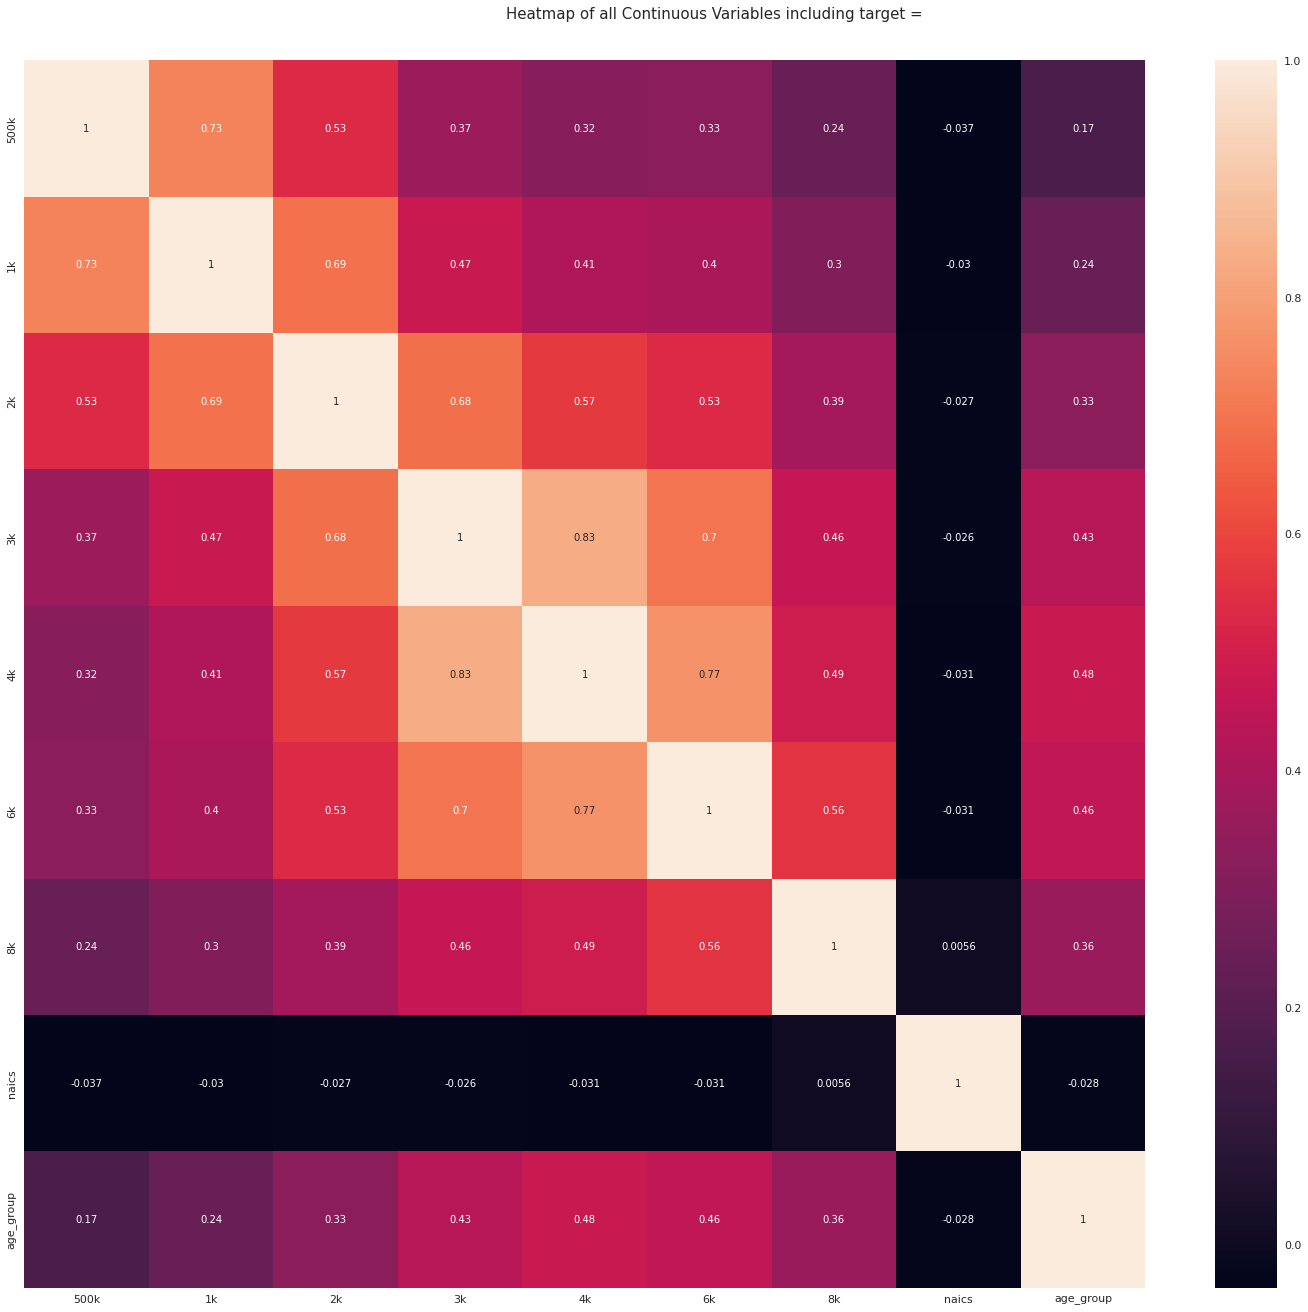

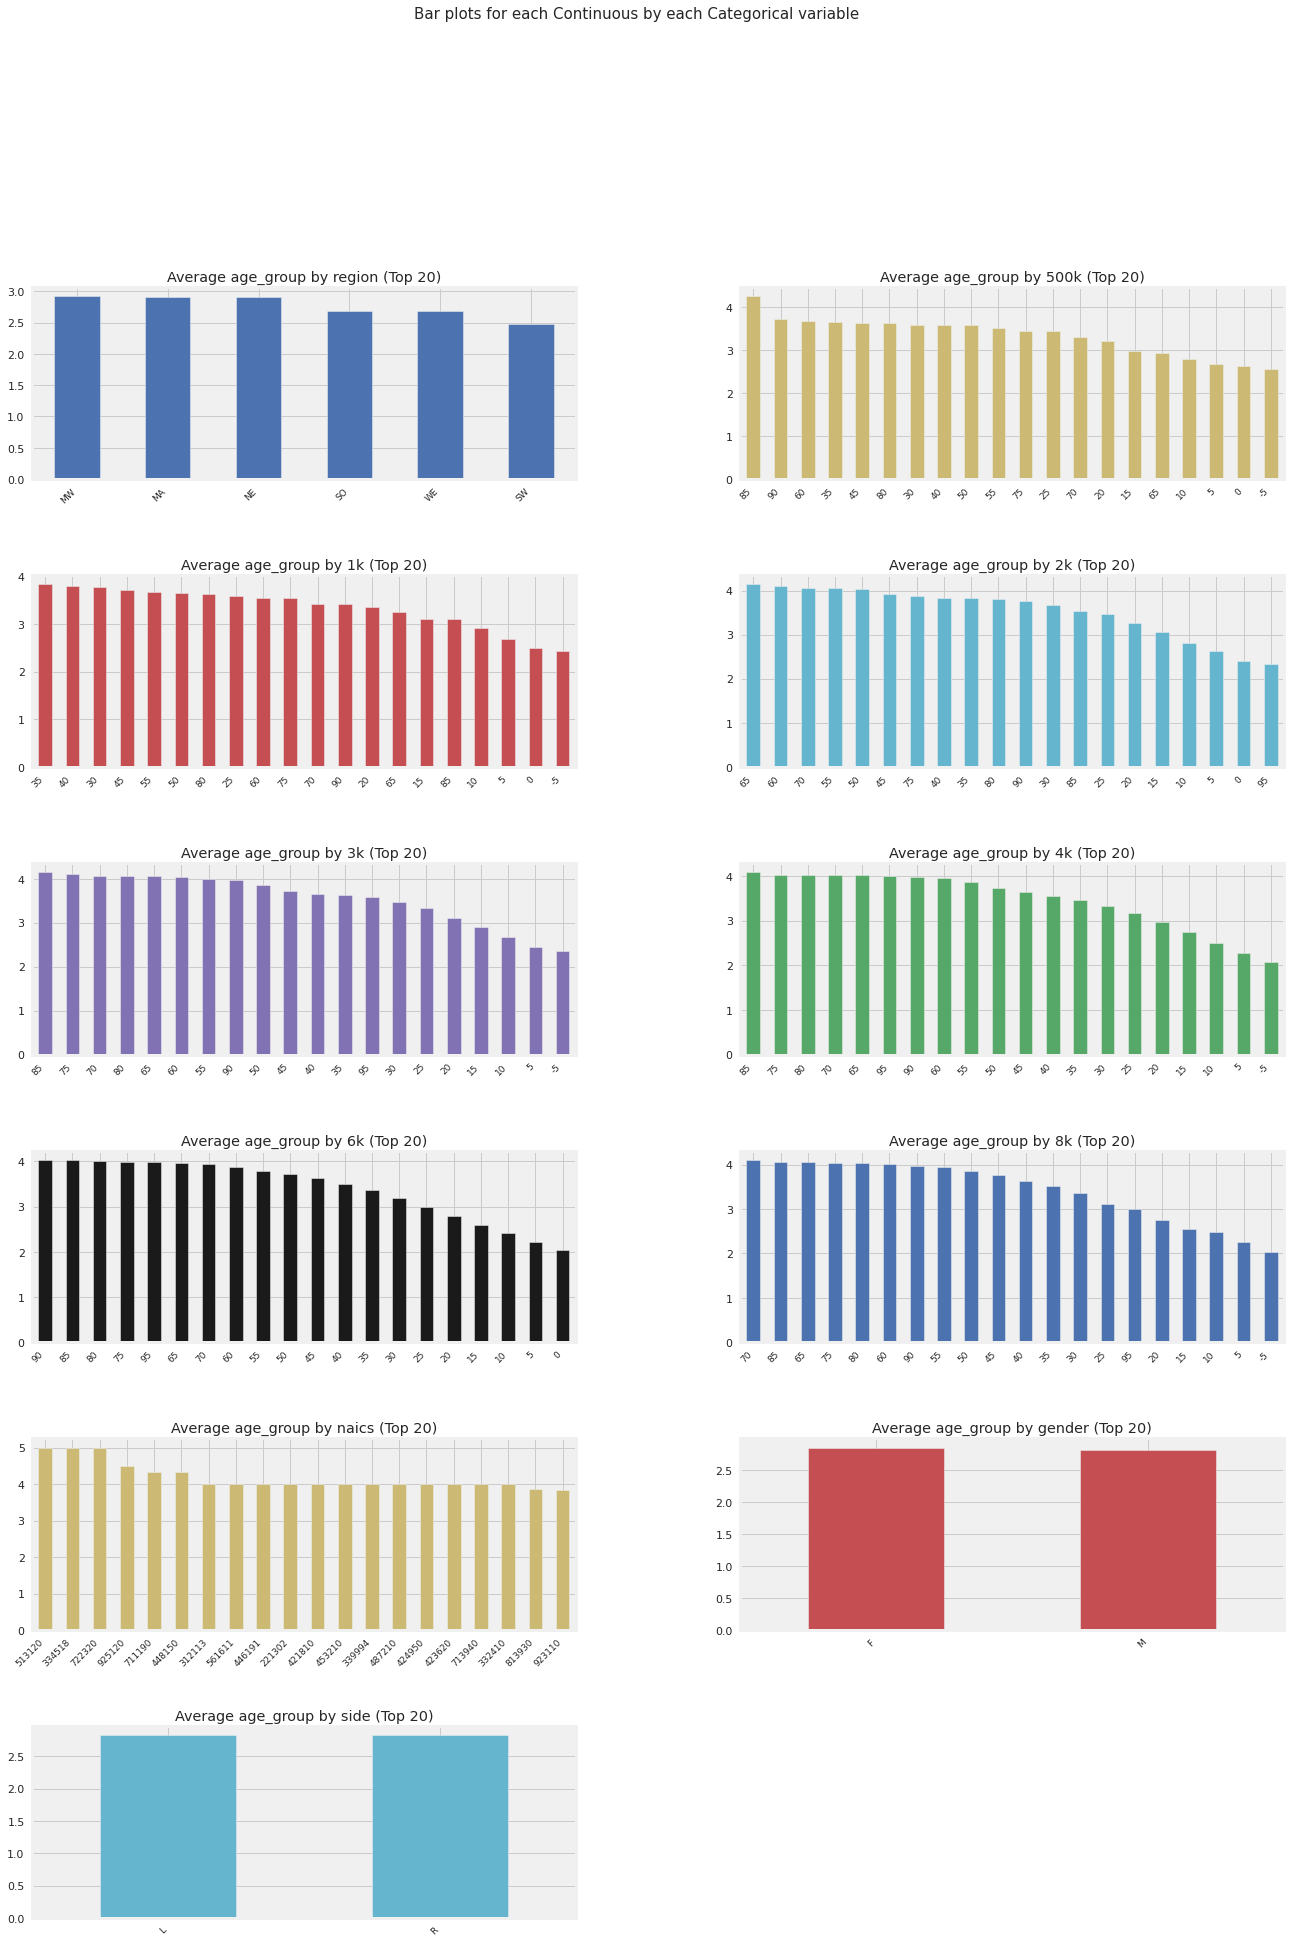

Time to run AutoViz = 5 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [372]:
_ = AV.AutoViz(str(d_path / 'df_audio_check_3.csv'))

#### Data explanation
Gender:  
M -> 0  
F -> 1

Region:  
MA -> 0  
SO -> 1  
NE -> 2  
MW -> 3  
WE -> 4  
SW -> 5  

Side:  
L -> 0  
R -> 1  

In [441]:
df_audio['age_group'] = df_audio['age_group'].astype('int8')

In [442]:
df_audio['gender'] = df_audio['gender'].apply(lambda x: 0 if x=='M' else 1).astype('int8').astype('category')

In [411]:
df_audio['naics'] = df_audio['naics'].astype('category')

In [444]:
region_d = {}
for i, region in enumerate(df_audio['region'].unique()):
    region_d[region] = i

df_audio['region'].replace(region_d, inplace=True)

In [445]:
df_audio['region'] = df_audio['region'].astype('category')

In [446]:
df_audio['side'] = df_audio['side'].apply(lambda x: 0 if x=="L" else 1).astype('int8').astype('category')

In [469]:
df_audio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5639396 entries, 0 to 5639395
Data columns (total 12 columns):
 #   Column     Dtype   
---  ------     -----   
 0   500k       int8    
 1   1k         int8    
 2   2k         int8    
 3   3k         int8    
 4   4k         int8    
 5   6k         int8    
 6   8k         int8    
 7   gender     category
 8   naics      category
 9   age_group  int8    
 10  region     category
 11  side       category
dtypes: category(4), int8(8)
memory usage: 70.0 MB


In [470]:
# Final Checkpoint
df_audio.to_csv(d_path / 'df_audio_v1.csv', index=False)

# Visualization & Feature Engineering

<AxesSubplot:>

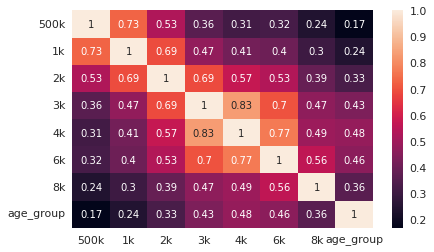

In [450]:
Var_Corr = df_audio.corr()
sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=True)

In [464]:
freq_cols = df_audio.columns[0:7]

In [481]:
freq_input_cols = ['2k','4k','6k']

In [487]:
cat_cols = list(df_audio.select_dtypes('category').columns)
cat_cols

['gender', 'naics', 'region', 'side']

In [476]:
df_audio.groupby('region')[freq_cols].mean()

,500k,1k,2k,3k,4k,6k,8k
region,,,,,,,
0,10.318757,8.938471,10.712907,15.355074,19.688019,22.227270,21.025871
1,9.500541,8.434320,10.208490,14.466415,18.016736,21.140562,20.383108
2,9.573324,8.189524,10.004561,14.201384,18.522123,22.010605,25.634218
3,8.993798,8.058787,10.214224,16.134452,20.792799,23.314094,27.141873
4,8.637208,7.892911,9.907307,14.517318,19.432054,22.550399,20.533356
5,9.120077,7.735212,9.148584,13.234786,17.744657,21.048953,20.910363


In [479]:
df_audio.groupby('side')[freq_cols].mean().head(60)

,500k,1k,2k,3k,4k,6k,8k
side,,,,,,,
0,9.288754,8.280203,10.732522,16.261421,20.691607,23.326805,23.881538
1,9.228636,8.209960,9.706758,14.385288,18.793496,21.696288,23.125249


In [480]:
df_audio.groupby('gender')[freq_cols].mean().head(60)

,500k,1k,2k,3k,4k,6k,8k
gender,,,,,,,
0,9.178182,8.338979,10.554443,16.87320,21.892072,23.828181,24.349969
1,9.536251,7.921378,9.065389,9.98034,12.332221,17.972512,20.584878


In [558]:
df_audio_corr

,500k,1k,2k,3k,4k,6k,8k,age_group,1pred,2pred,3pred
500k,1.000000,0.727553,0.526395,0.360222,0.312328,0.322484,0.242599,0.168116,0.332330,0.337909,0.322024
1k,0.727553,1.000000,0.688072,0.471983,0.412095,0.401087,0.302514,0.243416,0.436167,0.443331,0.419861
2k,0.526395,0.688072,1.000000,0.685414,0.573072,0.532571,0.387856,0.329704,0.608837,0.624152,0.584769
3k,0.360222,0.471983,0.685414,1.000000,0.833295,0.700169,0.466620,0.431346,0.662556,0.730045,0.686141
4k,0.312328,0.412095,0.573072,0.833295,1.000000,0.767209,0.491247,0.477424,0.704426,0.730200,0.690375
6k,0.322484,0.401087,0.532571,0.700169,0.767209,1.000000,0.559946,0.458673,0.689613,0.691724,0.669761
8k,0.242599,0.302514,0.387856,0.466620,0.491247,0.559946,1.000000,0.361554,0.450151,0.453445,0.544537
age_group,0.168116,0.243416,0.329704,0.431346,0.477424,0.458673,0.361554,1.000000,0.566450,0.539429,0.509784


In [460]:
# 4th prediction = 8k

In [551]:
df_audio_corr

,500k,1k,2k,3k,4k,6k,8k,age_group,1pred,2pred,3pred
500k,1.000000,0.727553,0.526395,0.360222,0.312328,0.322484,0.242599,0.168116,0.387069,0.380357,0.380357
1k,0.727553,1.000000,0.688072,0.471983,0.412095,0.401087,0.302514,0.243416,0.500418,0.493309,0.493309
2k,0.526395,0.688072,1.000000,0.685414,0.573072,0.532571,0.387856,0.329704,0.701881,0.697764,0.697764
3k,0.360222,0.471983,0.685414,1.000000,0.833295,0.700169,0.466620,0.431346,0.739626,0.804720,0.804720
4k,0.312328,0.412095,0.573072,0.833295,1.000000,0.767209,0.491247,0.477424,0.780094,0.793394,0.793394
6k,0.322484,0.401087,0.532571,0.700169,0.767209,1.000000,0.559946,0.458673,0.766593,0.749987,0.749987
8k,0.242599,0.302514,0.387856,0.466620,0.491247,0.559946,1.000000,0.361554,0.479683,0.476417,0.476417
age_group,0.168116,0.243416,0.329704,0.431346,0.477424,0.458673,0.361554,1.000000,0.421934,0.424287,0.424287


In [492]:
df_audio_input = df_audio[freq_input_cols + ['age_group'] + cat_cols + ['3k']]

#### Numerical Corr

<AxesSubplot:>

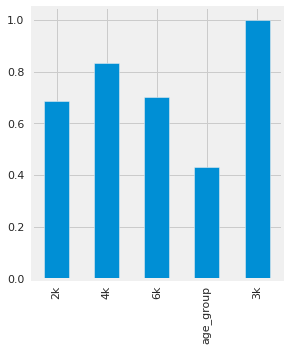

In [504]:
(df_audio.corr().loc['3k']
 .plot(kind='bar', figsize=(4,5)))

<AxesSubplot:>

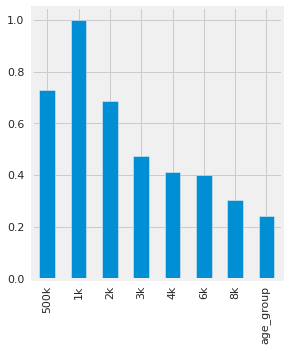

In [548]:
(df_audio.corr().loc['1k']
 .plot(kind='bar', figsize=(4,5)))

<AxesSubplot:>

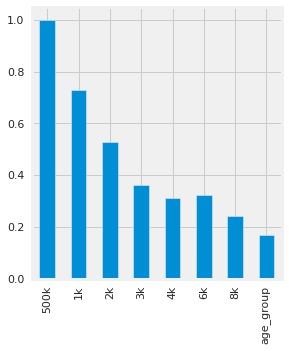

In [549]:
(df_audio.corr().loc['500k']
 .plot(kind='bar', figsize=(4,5)))

<AxesSubplot:>

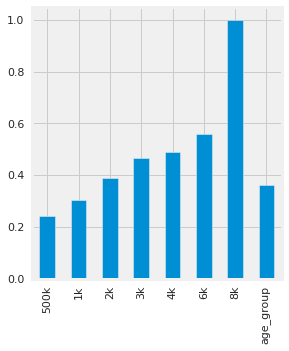

In [550]:
(df_audio.corr().loc['8k']
 .plot(kind='bar', figsize=(4,5)))

#### Categorical Corr

In [539]:
cat_cols_temp = ['gender', 'region']

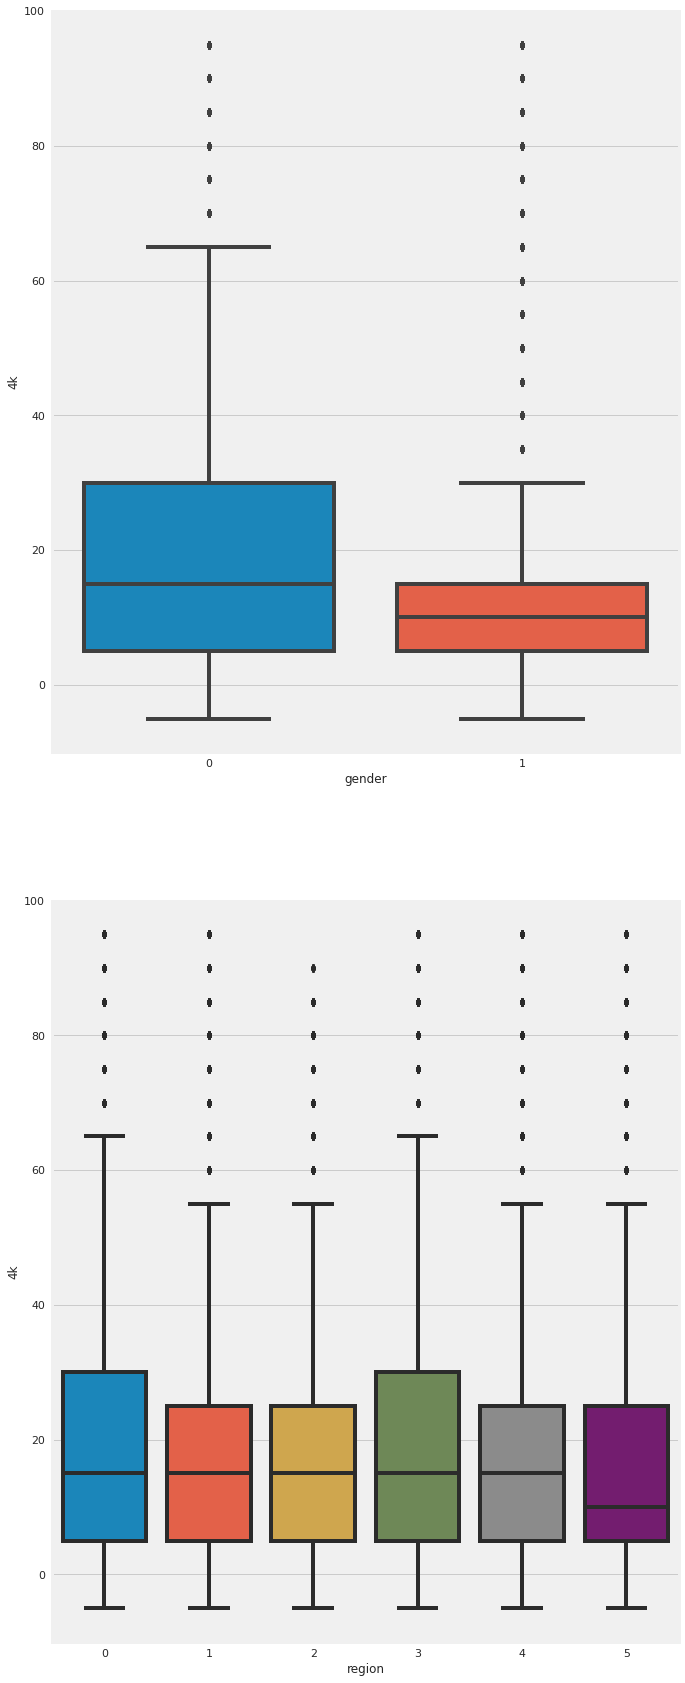

In [562]:
fig, axs = plt.subplots(nrows=2, figsize=(10,30))

for i, cat_col in enumerate(cat_cols_temp):
    sns.boxplot(y = '4k', x = cat_col, data=df_audio, ax=axs[i])

In [566]:
# Gender is only valuable on 3k prediction
gender_corr_l = []

for c in freq_cols:
    print(f"Column: {c}")
    print(stats.pointbiserialr(df_audio['gender'], df_audio[c]))

Column: 500k
PointbiserialrResult(correlation=0.020844100391307203, pvalue=0.0)
Column: 1k
PointbiserialrResult(correlation=-0.02225663260848897, pvalue=0.0)
Column: 2k
PointbiserialrResult(correlation=-0.05579026913206612, pvalue=0.0)
Column: 3k
PointbiserialrResult(correlation=-0.17753791998192328, pvalue=0.0)
Column: 4k
PointbiserialrResult(correlation=-0.2147597313510279, pvalue=0.0)
Column: 6k
PointbiserialrResult(correlation=-0.13253501427598013, pvalue=0.0)
Column: 8k
PointbiserialrResult(correlation=-0.0726281049740277, pvalue=0.0)


In [ ]:
# Side is not valuable
for c in freq_cols:
    print(stats.pointbiserialr(df_audio['side'], df_audio[c]))

In [537]:
df_audio.drop(columns="side", inplace=True)

In [569]:
df_audio.drop(columns="naics", inplace=True)

In [591]:
# Final Checkpoint
df_audio.to_csv(d_path / 'df_audio_v1.csv', index=False)

In [592]:
df_audio.head()

,500k,1k,2k,3k,4k,6k,8k,gender,age_group,region
0,10,5,5,15,10,5,25,0,4,0
1,15,10,5,15,5,10,25,0,5,0
2,5,10,20,20,15,20,0,0,2,0
3,15,5,15,20,20,15,15,0,3,0
4,25,20,15,20,35,25,15,0,3,0


#### Conclusions:
* | age_group | is a important feature
* | side   | is not valuable  
* | gender | is valuable only for 3k prediction  
* | region | is valuable only for 8k prediction  
* | naics  | requires a subject, business understand and proper balance

#### Correlation

In [573]:
df_audio_corr = df_audio.corr()

In [574]:
# 1st prediction = 3k
df_audio_corr['1pred'] = df_audio_corr.apply(lambda df: (df['2k'] + df['4k'] + df['6k'] + df['age_group']) / 4)

In [578]:
df_audio_corr['1pred'].sort_values(ascending=False).index

Index(['4k', '6k', '3k', '2k', 'age_group', '8k', '1k', '500k'], dtype='object')

In [555]:
# 2nd prediction = 8k
# 2 factors (age)
df_audio_corr['2pred'] = df_audio_corr.apply(lambda df: (df['2k'] + df['3k'] + df['4k'] + df['6k'] + df['age_group']) / 5)

In [557]:
# 3rd prediction = 1k
df_audio_corr['3pred'] = df_audio_corr.apply(lambda df: (df['2k'] + df['3k'] + df['4k'] + df['6k'] + df['8k'] + df['age_group'] ) / 6)

In [ ]:
# 4th prediction = 500k

In [586]:
# Function to get correct order

df_audio_corr = df_audio.corr()

def add_columns(df, cols):
    total=0
    count=len(cols)
    for c in cols:
        total+=df[c]
    
    return total / count

def get_pred_order(df, input_cols):
    col_len = len(input_cols)
    order_l = []
    for i, _ in enumerate(range(col_len, 8)):
        df[f'{i}pred'] = df.apply(add_columns, cols=input_cols)
        col_order = df_audio_corr[f'{i}pred'].sort_values(ascending=False).index
        for c in col_order:
            if c not in input_cols:
                order_l.append(c)
                input_cols.append(c)
                break
    
    return order_l

In [587]:
get_pred_order(df_audio_corr, ['2k','4k', '6k', 'age_group'])

['3k', '8k', '1k', '500k']

In [590]:
get_pred_order(df_audio_corr, ['2k','4k', '6k', '500k', 'age_group'])

['3k', '1k', '8k']

In [593]:
df_audio_corr.to_csv(d_path / 'df_audio_corr.csv', index=False)